2D Map Eval

In [34]:
#model_types = ["articles_large.index", "articles.index", "articles_incl_ARG"]
model_type = "data/ABPR/articles_large.index"

# Evaluation of embedding without query and improvements

Article ID: 0, Distance: 0.0
Article ID: 197, Distance: 0.7083922624588013
Article ID: 195, Distance: 0.7371349334716797
Article ID: 270, Distance: 0.7473189830780029
Article ID: 237, Distance: 0.7609228491783142


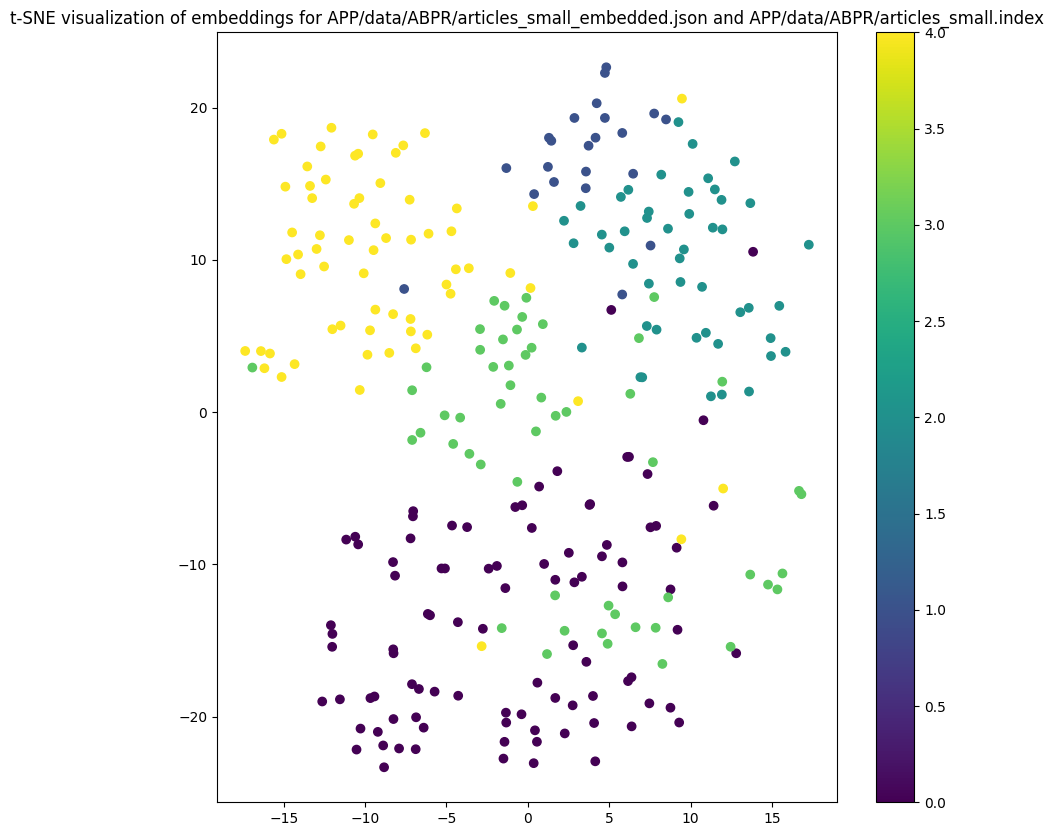

Article ID: 0, Distance: 0.0
Article ID: 195, Distance: 0.6746934652328491
Article ID: 197, Distance: 0.7724854946136475
Article ID: 184, Distance: 0.7762693762779236
Article ID: 1, Distance: 0.7864160537719727


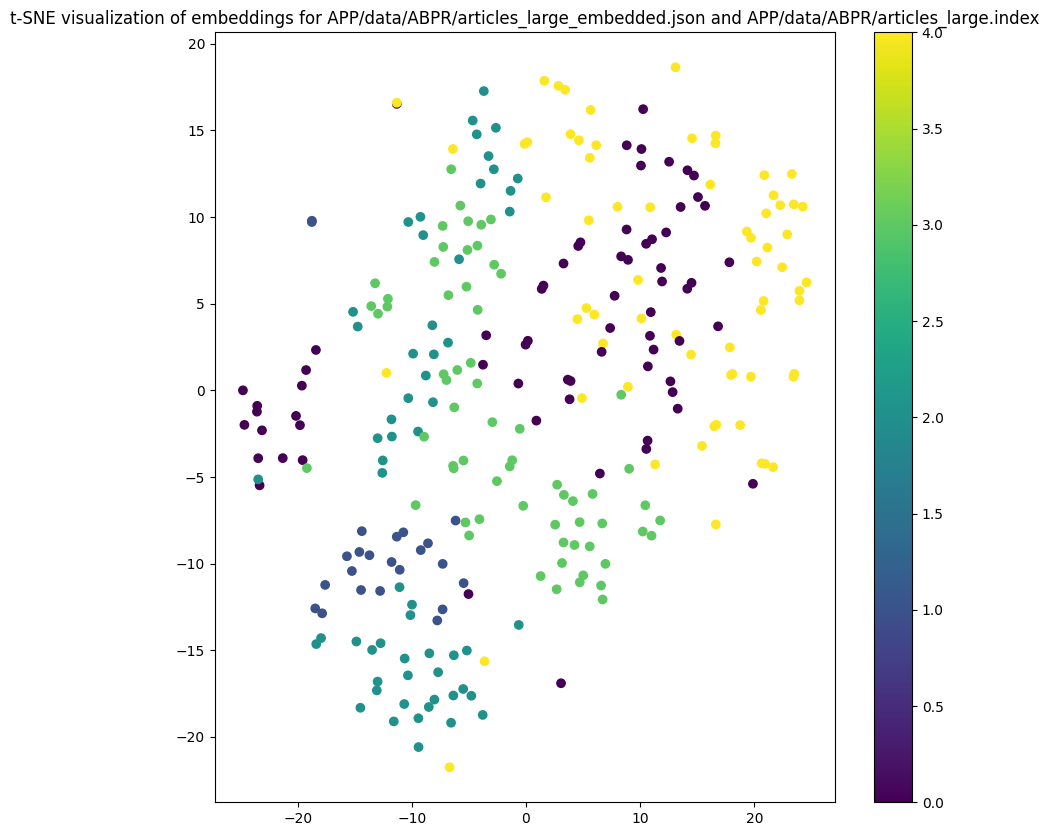

Article ID: 0, Distance: 0.0
Article ID: 1, Distance: 0.5181030035018921
Article ID: 2, Distance: 0.6536480784416199
Article ID: 4, Distance: 0.6753283739089966
Article ID: 3, Distance: 0.6871711015701294


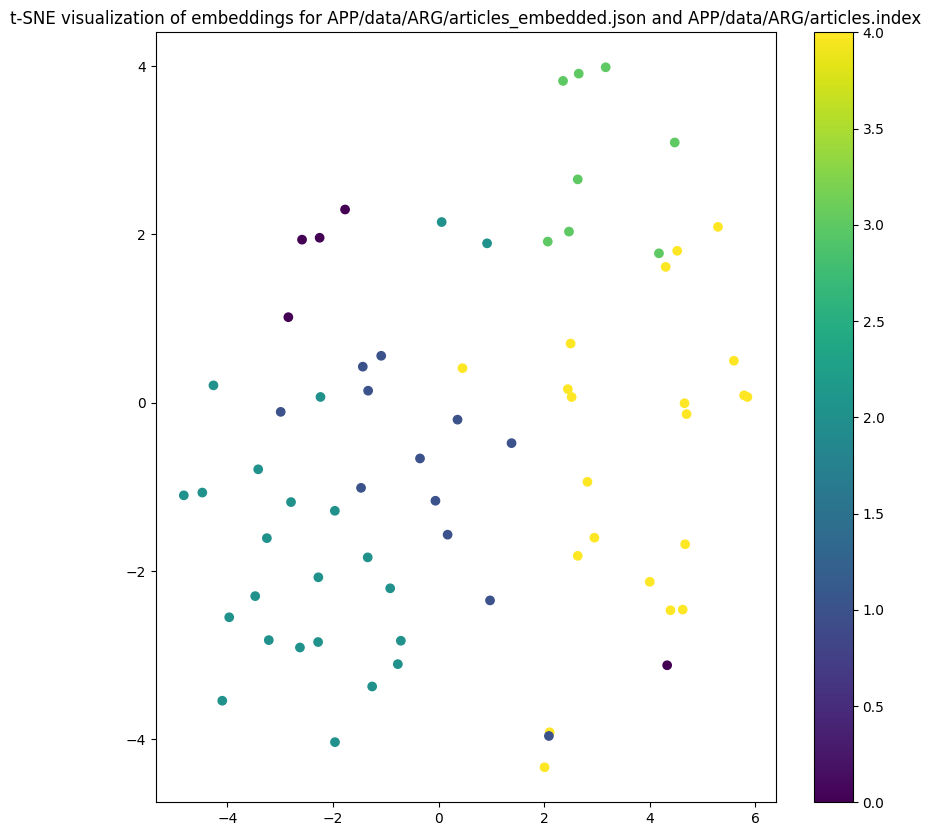

Article ID: 0, Distance: 0.0
Article ID: 184, Distance: 0.7773047685623169
Article ID: 1, Distance: 0.7862243056297302
Article ID: 2, Distance: 0.8157381415367126
Article ID: 21, Distance: 0.912323534488678


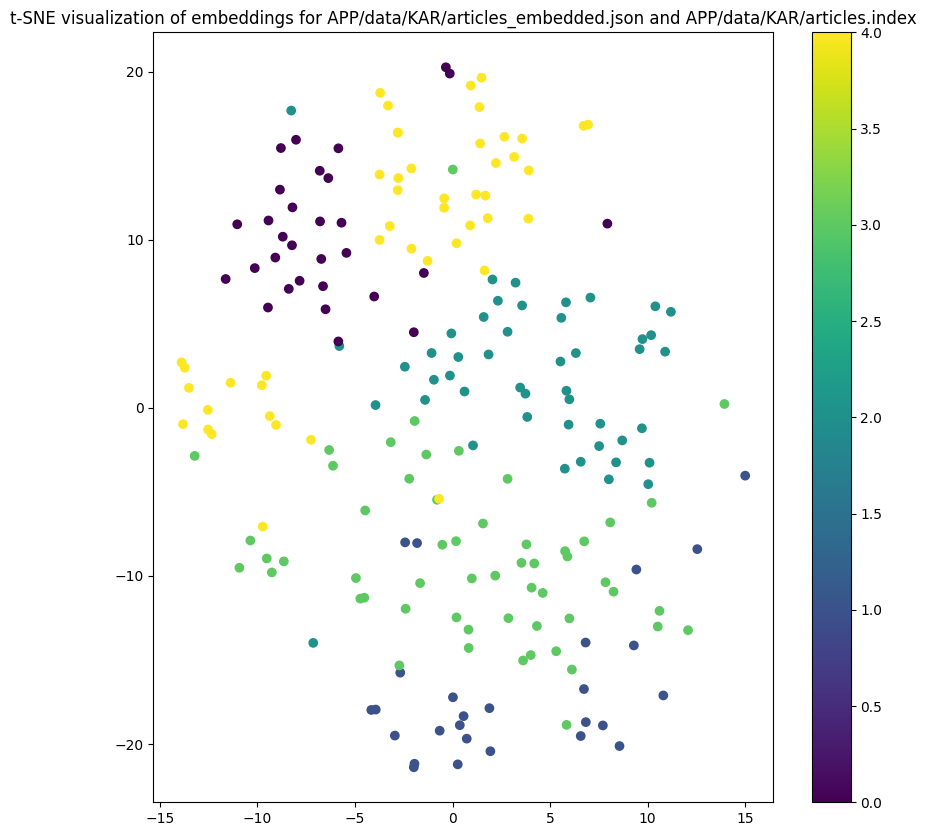

Article ID: 0, Distance: 0.0
Article ID: 2, Distance: 0.6252580881118774
Article ID: 184, Distance: 0.7486778497695923
Article ID: 1, Distance: 0.7853894233703613
Article ID: 5, Distance: 0.800553560256958


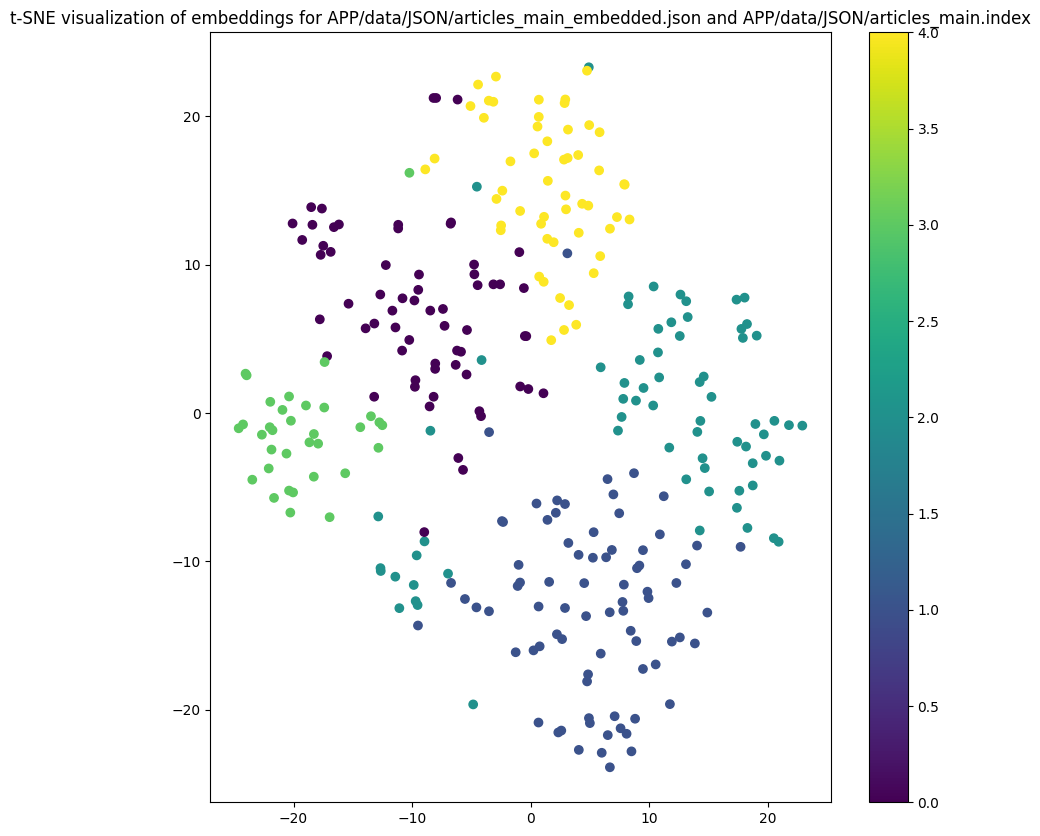

In [35]:
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json
import os

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_model(json_files, index_files, name):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]), k)
            return I[0], D[0]

        # Evaluate with a few sample queries
        sample_query = data[0]['embedding']
        neighbors, distances = similarity_search(sample_query)
        for idx, distance in zip(neighbors, distances):
            print(f"Article ID: {idx}, Distance: {distance}")

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        #print(similarity_matrix)
        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis')
        plt.colorbar()
        plt.title(f"t-SNE visualization of embeddings for {json_file} and {index_file}")
        plt.show()

# Provide the correct paths to your files
evaluate_model(
 ["APP/data/ABPR/articles_small_embedded.json", "APP/data/ABPR/articles_large_embedded.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json", "APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/ABPR/articles_small.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index", "APP/data/JSON/articles_main.index"],
    ["ABPR_small", "ABPR_large", "ARG", "KAR", "Main"],
)

# Evaluation of improved Query as 3d Model:


Originales Query: Was sind die Pausenregelungen?


improving query... 


improved query: Welche Pausenregelungen gelten für Mitarbeiter am Stadtspital Zürich in der Schweiz?

Wie lang sind die Pausen für Angestellte am Stadtspital Zürich in der Schweiz?

Gibt es spezielle Vorschriften für die Pausenregelungen von Mitarbeitern am Stadtspital Zürich in der Schweiz?

Welche Arten von Pausen sind für Angestellte am Stadtspital Zürich in der Schweiz vorgesehen?

Wie häufig sind Pausen für Mitarbeiter am Stadtspital Zürich in der Schweiz erlaubt?

FAISS index dimensionality: 1536
Article ID: 125 ABPR,  Distance: 0.7175337076187134 Besondere Verhältnisse
Article ID: 176 ABPR,  Distance: 0.7259659767150879 Nacht- und Sonntagsarbeit
Article ID: 169 ABPR,  Distance: 0.7339983582496643 Arbeitsfreie Tage (Ruhetage)
Article ID: 174 ABPR,  Distance: 0.7789216041564941 Pauschale Abgeltung oder Kompensation von Überzeit
Article ID: 175 ABPR,  Distance: 0.7844991087913513 Beschränkte Abgeltung von Übe

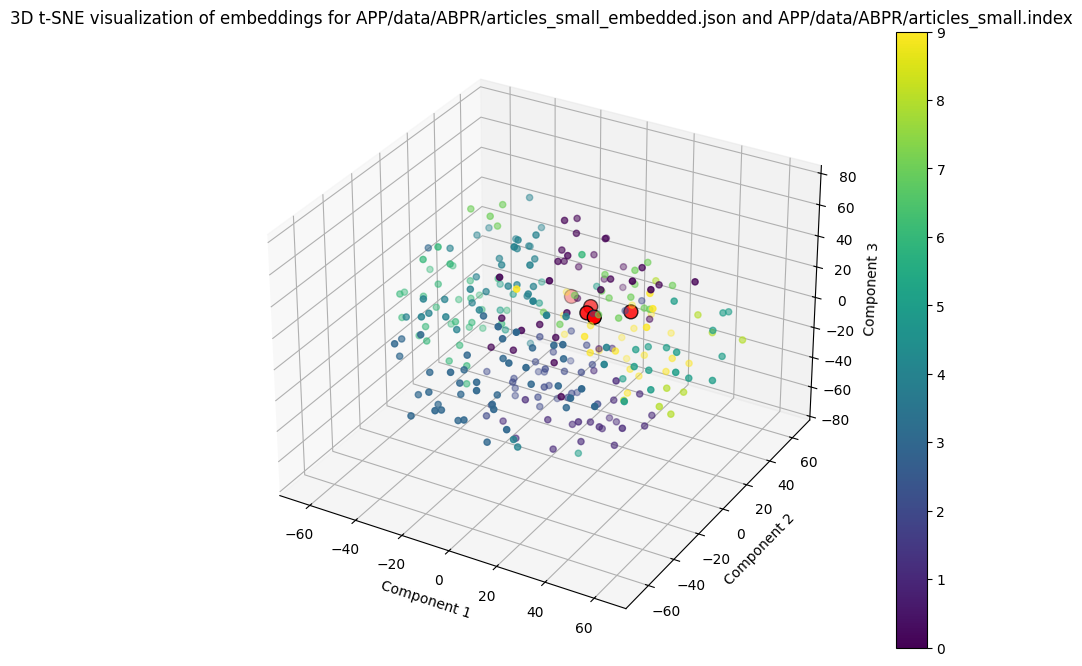

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.6699987649917603 Pausen
Article ID: 169 ABPR,  Distance: 0.8040776252746582 Arbeitsfreie Tage (Ruhetage)
Article ID: 109 ABPR,  Distance: 0.8324785232543945 Beiträge an Hauptmahlzeiten; Barvergütung an Stelle von Lunch-Checks bei angeordneter Überzeit oder bei verschobener Mittagszeit
Article ID: 183 ABPR,  Distance: 0.8459579944610596 Arbeitsmedizinische Untersuchung auf Wunsch von Angestellten
Article ID: 276 PR,  Distance: 0.8846331834793091 Arbeitszeit


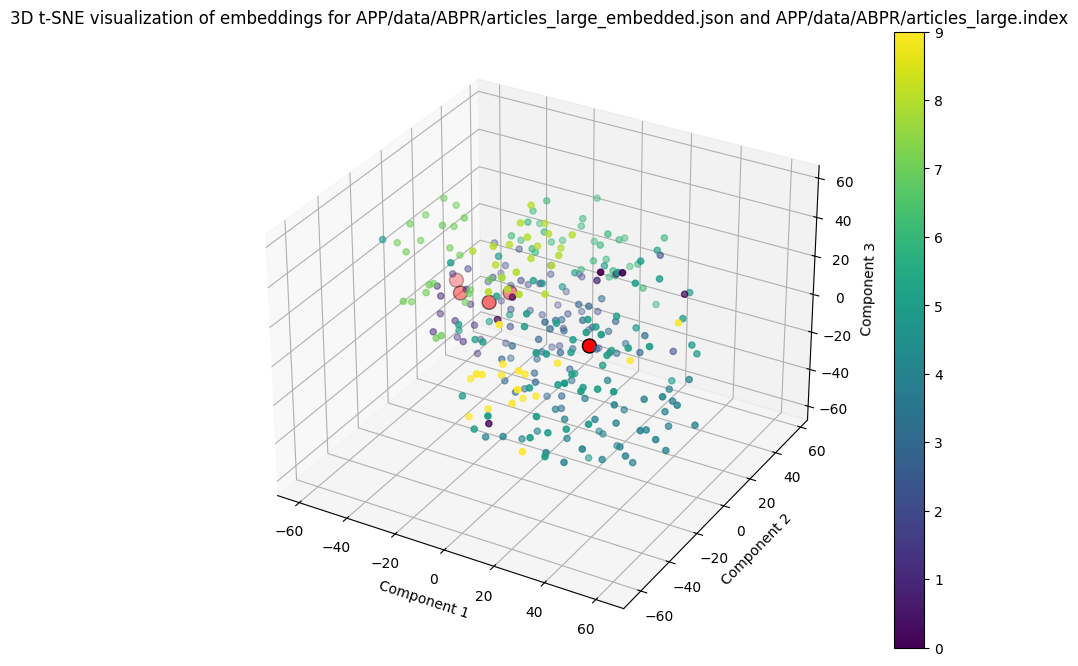

FAISS index dimensionality: 3072
Article ID: 41 ARG,  Distance: 0.9535291194915771 Arbeitnehmer mit Familienpflichten
Article ID: 14 ARG,  Distance: 0.9549978971481323 Pausen
Article ID: 39 ARG,  Distance: 0.9616060256958008 Beschäftigung bei Mutterschaf
Article ID: 9 ARG,  Distance: 0.9704945683479309 Wöchentliche Höchstarbeitszeit
Article ID: 30 ARG,  Distance: 0.994691014289856 Schichtenwechse


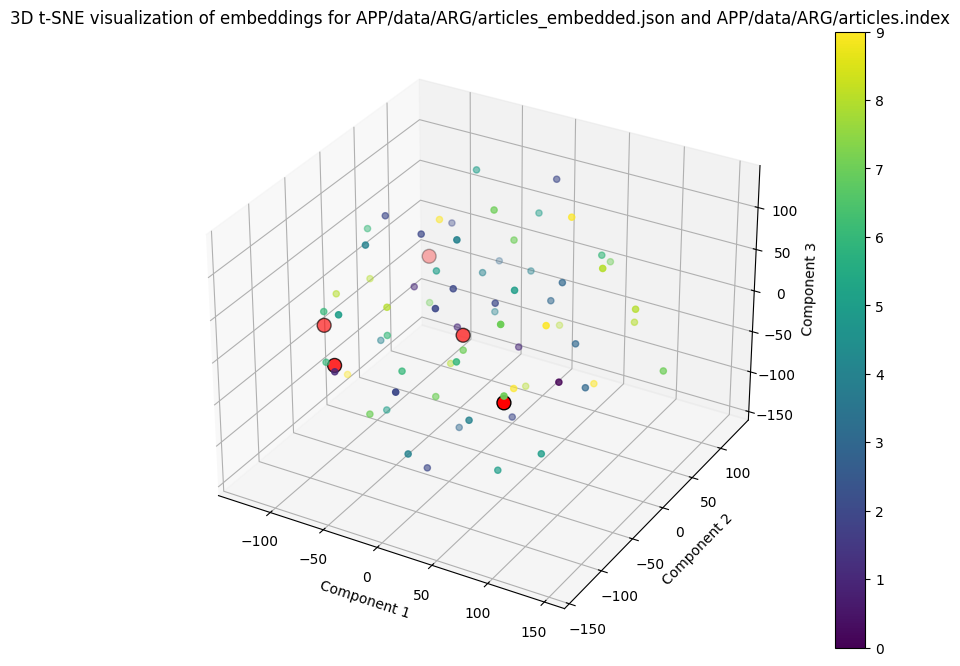

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.669276237487793 Pausen
Article ID: 169 ABPR,  Distance: 0.804397463798523 Arbeitsfreie Tage (Ruhetage)
Article ID: 109 ABPR,  Distance: 0.8331550359725952 Beiträge an Hauptmahlzeiten; Barvergütung an Stelle von Lunch-Checks bei angeordneter Überzeit oder bei verschobener Mittagszeit
Article ID: 183 ABPR,  Distance: 0.8459614515304565 Arbeitsmedizinische Untersuchung auf Wunsch von Angestellten
Article ID: 198 KAR,  Distance: 0.8824453949928284 Arbeitszeit


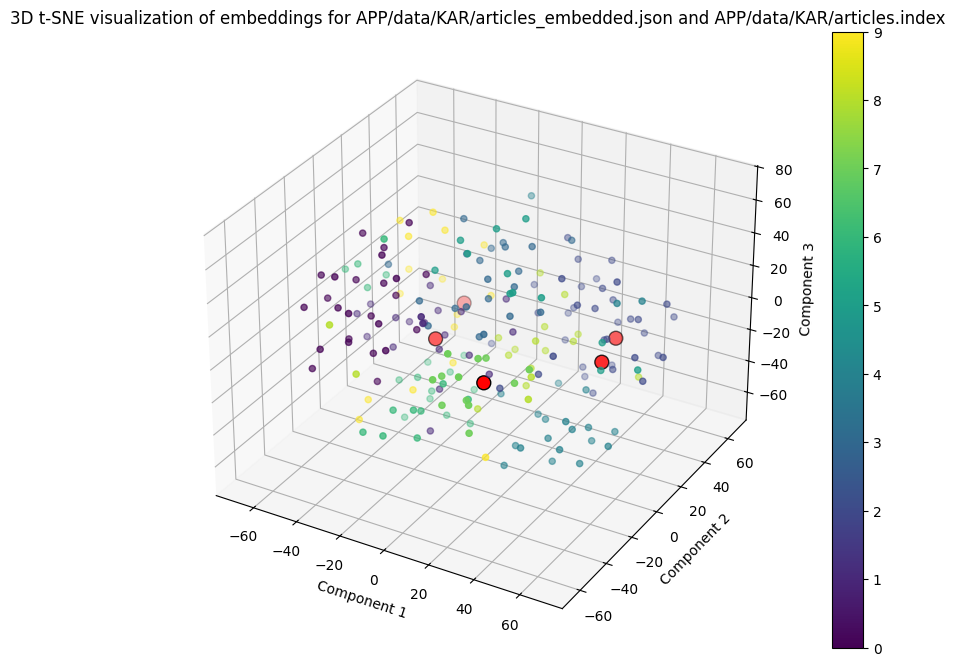

FAISS index dimensionality: 3072
Article ID: 282 PReg,  Distance: 0.6008881330490112 Allgemeines
Article ID: 283 PReg,  Distance: 0.6338328123092651 Pausenregelung
Article ID: 217 AZRG,  Distance: 0.647217869758606 Verpflegungspause
Article ID: 170 ABPR,  Distance: 0.652121365070343 Pausen
Article ID: 284 PReg,  Distance: 0.6958823204040527 Pausenregelung für Assistenzärztinnen und -ärzte


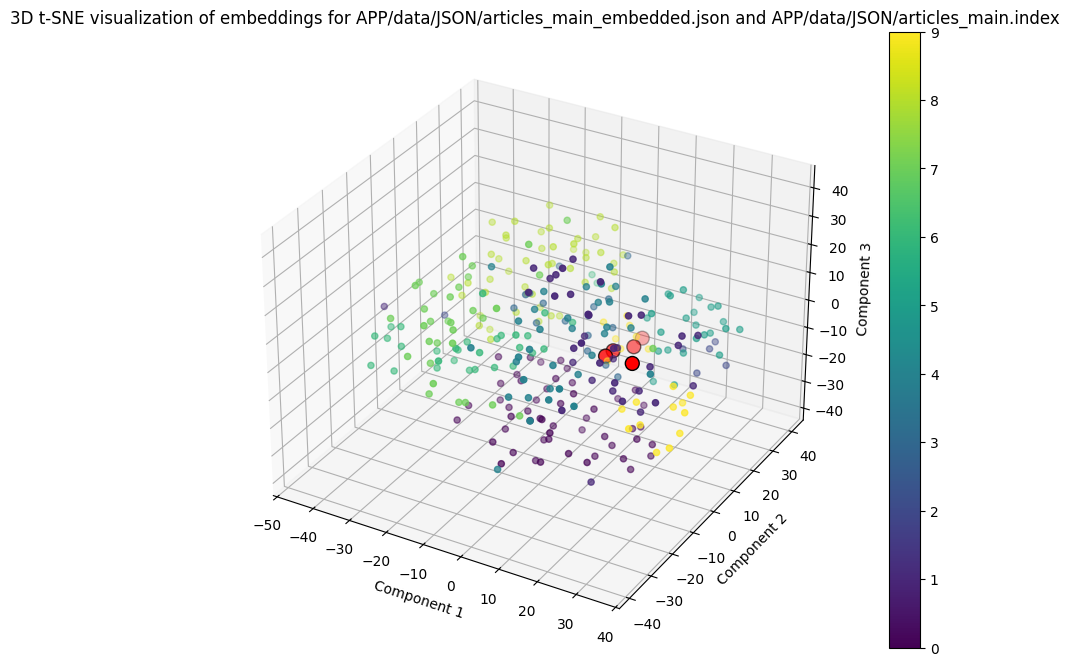

In [36]:
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv

client = OpenAI()
load_dotenv()

client.api_key = os.getenv('OPENAI_API_KEY')

# Function to load JSON data from a file

model_large = "text-embedding-3-large"  
model_small = "text-embedding-3-small" 


def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def get_embedding_large(text, model=model_large):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def get_embedding_small(text, model=model_small):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def evaluate_models(json_files, index_files, names, models, query):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]
    if isinstance(names, str):
        names = [names]
    if isinstance(models, str):
        models = [models]

    for json_file, index_file, dataset_name, model in zip(json_files, index_files, names, models):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Check the dimensionality of the FAISS index
        print(f"FAISS index dimensionality: {index.d}")

        # Convert query to embedding
        if model == "large":
            query_embedding = get_embedding_large(query)
        elif model == "small":
            query_embedding = get_embedding_small(query)
        else:
            raise ValueError("Invalid model type specified")
            

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]).astype('float32'), k)
            return I[0], D[0]

        # Perform similarity search with the query embedding
        neighbors, distances = similarity_search(query_embedding)
        closest_titles = [data[idx]['title'] for idx in neighbors]
        closest_Gesetzestext = [data[idx]['metadata']['Gesetzestext'] for idx in neighbors]
        for idx, distance, gesetzestext, title in zip(neighbors, distances, closest_Gesetzestext, closest_titles):
            print(f"Article ID: {idx} {gesetzestext},  Distance: {distance} {title}")

        
        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        #print(similarity_matrix)

        # Clustering
        kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings)
        labels = kmeans.labels_

       
        # Visualize with 3D t-SNE
        tsne = TSNE(n_components=3, random_state=0)
        embeddings_3d = tsne.fit_transform(embeddings)



        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=labels, cmap='viridis')

 # Highlight closest articles
        closest_points = embeddings_3d[neighbors]
        ax.scatter(closest_points[:, 0], closest_points[:, 1], c='red', edgecolors='k', s=100, label='Closest Articles')

        plt.colorbar(sc)
        ax.set_title(f"3D t-SNE visualization of embeddings for {json_file} and {index_file}")
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')

        plt.show()

query = "Was sind die Pausenregelungen?"


def refine_query(query):
    print("\nOriginales Query: " + query + "\n")
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": f"Erweitere die User Frage: <anfrage>{query}</anfrage>, mit Suchbegriffen, damit die Frage möglichst gute RAG ergebnisse liefert. Der erweiterte Anfrage soll ich immer auf den Kontext einer Anstellung am Stadtspital Zürich in der Schweiz beziehen. Alle Antworten sollen als Fragen formuliert sein"},
        ]
    )
    response = response.choices[0].message.content
    print("\nimproving query... \n")
    print("\nimproved query: " + response + "\n")
    return response
# Provide the correct paths to your files

query = refine_query(query)

"""
evaluate_models(
    ["APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/JSON/articles_main.index"],
    ["Main"],
    ["large"],
    query
)
"""
evaluate_models(
  ["APP/data/ABPR/articles_small_embedded.json", "APP/data/ABPR/articles_large_embedded.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json", "APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/ABPR/articles_small.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index", "APP/data/JSON/articles_main.index"],
    ["ABPR_small", "ABPR_large", "ARG", "KAR", "Main"],
    ["small", "large", "large", "large", "large"],
    query

)


# Evaluation of distribution of embeddings as histogram

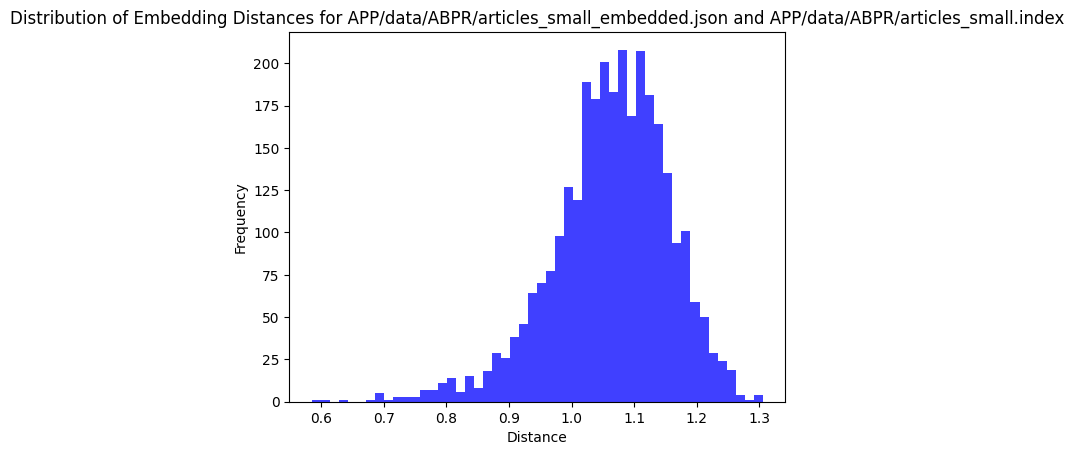

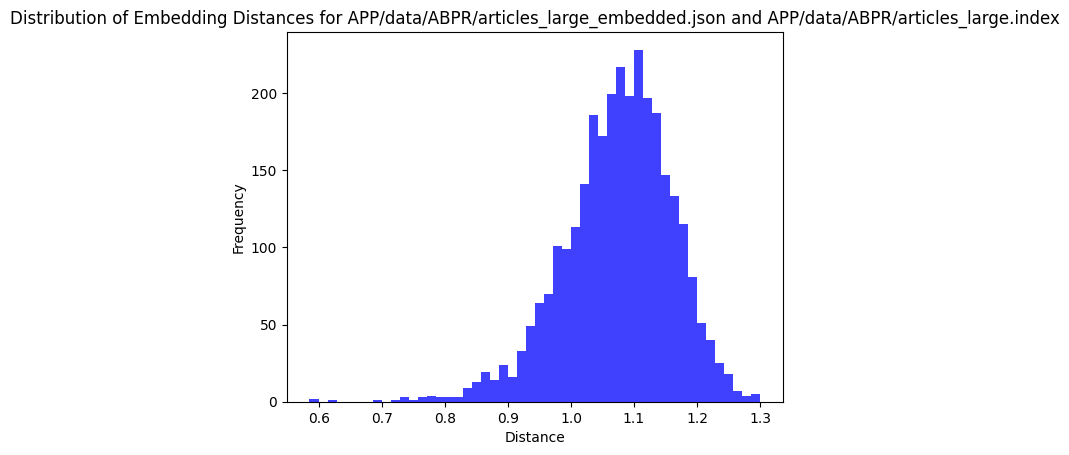

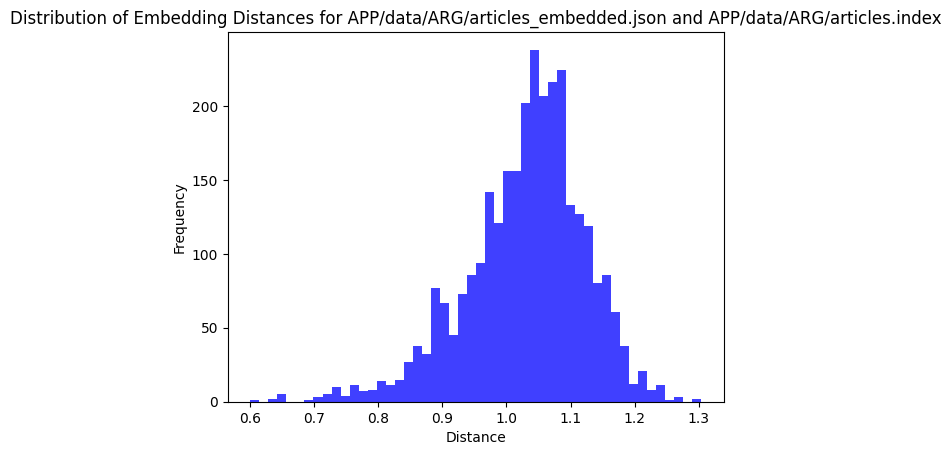

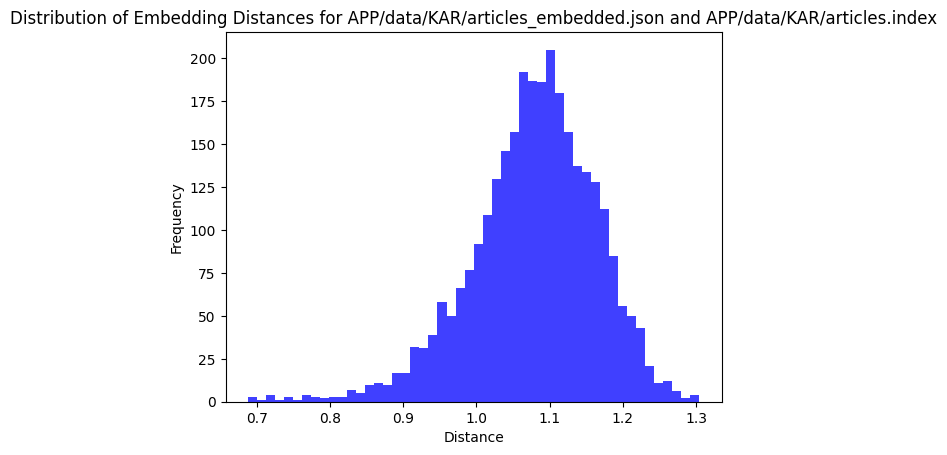

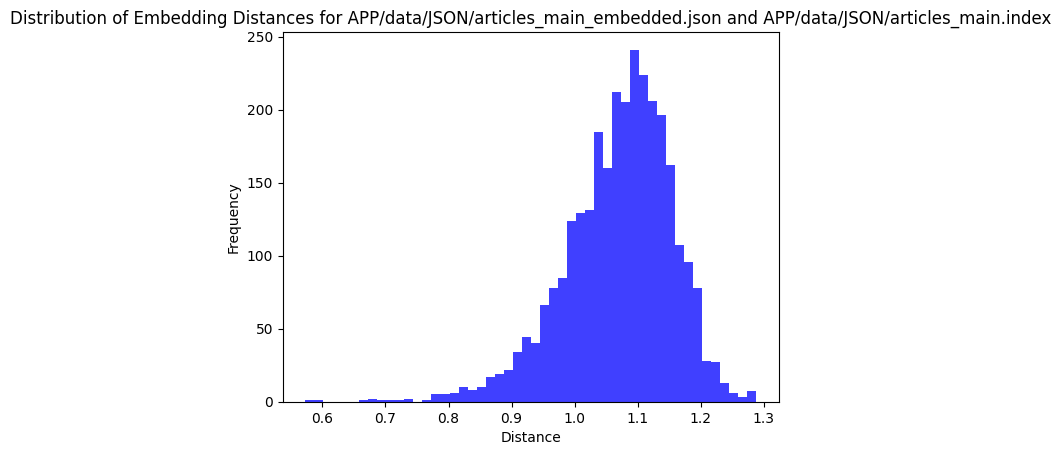

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import faiss
import json
import os

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_distance_distribution(json_files, index_files, sample_size=3000):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Calculate distances between a sample of pairs
        distances = []

        for _ in range(sample_size):
            idx1, idx2 = np.random.choice(len(embeddings), 2, replace=False)
            distance = np.linalg.norm(embeddings[idx1] - embeddings[idx2])
            distances.append(distance)

        # Plot the distribution of distances
        plt.hist(distances, bins=50, alpha=0.75, color='blue')
        plt.title(f"Distribution of Embedding Distances for {json_file} and {index_file}")
        plt.xlabel("Distance")
        plt.ylabel("Frequency")
        plt.show()

# Provide the correct paths to your files
evaluate_distance_distribution(
    ["APP/data/ABPR/articles_small_embedded.json", "APP/data/ABPR/articles_large_embedded.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json", "APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/ABPR/articles_small.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index", "APP/data/JSON/articles_main.index"],

    )


# Evaluation of individual, actual RAG return given a specific embedding

In [38]:
import openai
import numpy as np
import faiss
import json

def get_embedding(text, tags=[], model="text-embedding-3-large"):
    text = text.replace("\n", " ")
    combine = text + " " .join(tags)
    return openai.embeddings.create(input=[combine], model=model).data[0].embedding


# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Load your articles data
file_path = 'App/data/JSON/articles_main.json'
model_type = 'App/data/JSON/articles_main.index'
data = load_json(file_path)

# Load your FAISS index
index = faiss.read_index(model_type)

# Define a function to perform similarity search
def similarity_search(query_embedding, k=5):
    D, I = index.search(np.array([query_embedding]), k)
    return I[0], D[0]

# Example query
query_text = "Wann habe ich Mutterschaftsurlaub?"
query_tags = ["tag1", "tag2"]  # Replace with relevant tags

# Generate embedding for the query
query_embedding = get_embedding(query_text, query_tags)

# Perform similarity search
neighbors, distances = similarity_search(query_embedding)

# Display the results
print("Query:", query_text)
for idx, distance in zip(neighbors, distances):
    article = data[idx]
    print(f"\nArtikel: {article['article_number']} {article['metadata']['Gesetzestext']}")
    print(f"Title: {article['title']}")
    print(f"Distance: {distance}")
    print(f"Title: {article['title']}")
    print(f"Text: {article['text']}")



Query: Wann habe ich Mutterschaftsurlaub?

Artikel: Art. 121 ABPR
Title: Anspruch auf Mutterschaftsurlaub
Distance: 0.6625231504440308
Title: Anspruch auf Mutterschaftsurlaub
Text: 1. Die Angestellte hat Anspruch auf einen bezahlten Mutterschaftsurlaub von insgesamt 16 Kalenderwochen, den sie frühestens zwei Wochen vor dem ärztlich bestimmten Geburtstermin antreten kann.
2. Ohne ärztliches Zeugnis werden Abwesenheiten von der Arbeit in den letzten zwei Wochen vor der Geburt auf den bezahlten Mutterschaftsurlaub angerechnet.
3. Muss die Angestellte ihre Tätigkeit wegen schwangerschaftsbedingter Beschwerden früher als zwei Wochen vor der Geburt niederlegen, besteht Lohnanspruch, wenn ein ärztliches Zeugnis vorgelegt wird.
4. Nach dem Mutterschaftsurlaub kann der Beschäftigungsgrad auf Gesuch der Angestellten unter Wahrung des Urlaubsanspruches reduziert werden, so weit die dienstlichen Verhältnisse es zulassen.
5. Im Rahmen der betrieblichen Möglichkeiten wird weiterer unbezahlter Urlaub

# Evaluation of individual, actual RAG return using an LM imporved query given a specific embedding

In [39]:
import openai
import numpy as np
import faiss
import json
from openai import OpenAI

load_dotenv()
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY')

def get_embedding(text, tags=[], model="text-embedding-3-large"):
    text = text.replace("\n", " ")
    combine = text + " " .join(tags)
    return openai.embeddings.create(input=[combine], model=model).data[0].embedding


# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Load your articles data
file_path = 'App/data/JSON/articles_main.json'
model_type = 'App/data/JSON/articles_main.index'
data = load_json(file_path)

# Load your FAISS index
index = faiss.read_index(model_type)

# Define a function to perform similarity search
def similarity_search(query_embedding, k=5):
    D, I = index.search(np.array([query_embedding]), k)
    return I[0], D[0]

# Example query
query_text = "Wann habe ich Mutterschaftsurlaub?"


def refine_query(query):
    print("\nOriginales Query: " + query + "\n")
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": f"Erweitere die User Frage: <anfrage>{query}</anfrage>, mit Suchbegriffen, damit die Frage möglichst gute RAG ergebnisse liefert. Der erweiterte Anfrage soll ich immer auf den Kontext einer Anstellung am Stadtspital Zürich in der Schweiz beziehen. Alle Antworten sollen als Fragen formuliert sein"},
        ]
    )
    response = response.choices[0].message.content
    print("\nimproving query... \n")
    print("\nimproved query: " + response + "\n")
    return response


query_text = refine_query(query_text)


query_tags = ["tag1", "tag2"]  # Replace with relevant tags

# Generate embedding for the query
query_embedding = get_embedding(query_text, query_tags)

# Perform similarity search
neighbors, distances = similarity_search(query_embedding)

# Display the results
#print("Query:", query_text)
for idx, distance in zip(neighbors, distances):
    article = data[idx]
    print(f"\nArtikel: {article['article_number']} {article['metadata']['Gesetzestext']}")
    print(f"Title: {article['title']}")
    print(f"Distance: {distance}")
    print(f"Title: {article['title']}")
    print(f"Text: {article['text']}")




Originales Query: Wann habe ich Mutterschaftsurlaub?


improving query... 


improved query: Wann beginnt der Mutterschaftsurlaub am Stadtspital Zürich?

Wie lange dauert der Mutterschaftsurlaub für Angestellte des Stadtspitals Zürich?

Welche Voraussetzungen gelten für den Mutterschaftsurlaub am Stadtspital Zürich?

Welche Leistungen sind im Mutterschaftsurlaub am Stadtspital Zürich enthalten?

Gibt es Möglichkeiten zur Verlängerung des Mutterschaftsurlaubs am Stadtspital Zürich?

Wie wirkt sich Mutterschaftsurlaub auf meinen Arbeitsvertrag am Stadtspital Zürich aus?

Kann ich meinen Mutterschaftsurlaub am Stadtspital Zürich flexibel gestalten?


Artikel: Art. 121 ABPR
Title: Anspruch auf Mutterschaftsurlaub
Distance: 0.6446361541748047
Title: Anspruch auf Mutterschaftsurlaub
Text: 1. Die Angestellte hat Anspruch auf einen bezahlten Mutterschaftsurlaub von insgesamt 16 Kalenderwochen, den sie frühestens zwei Wochen vor dem ärztlich bestimmten Geburtstermin antreten kann.
2. Ohne ärzt

FAISS index dimensionality: 1536
Article ID: 170 ABPR,  Distance: 0.756586492061615 Pausen
Article ID: 123 ABPR,  Distance: 0.9231743812561035 Beschäftigungserleichterung
Article ID: 161 ABPR,  Distance: 0.9294896125793457 Geschäfts- und Blockzeit
Article ID: 159 ABPR,  Distance: 0.9403868913650513 Grundsätze zur flexiblen und gleitenden Arbeitszeit
Article ID: 140 ABPR,  Distance: 0.9643549919128418 Urlaubs- und Kostenregelung


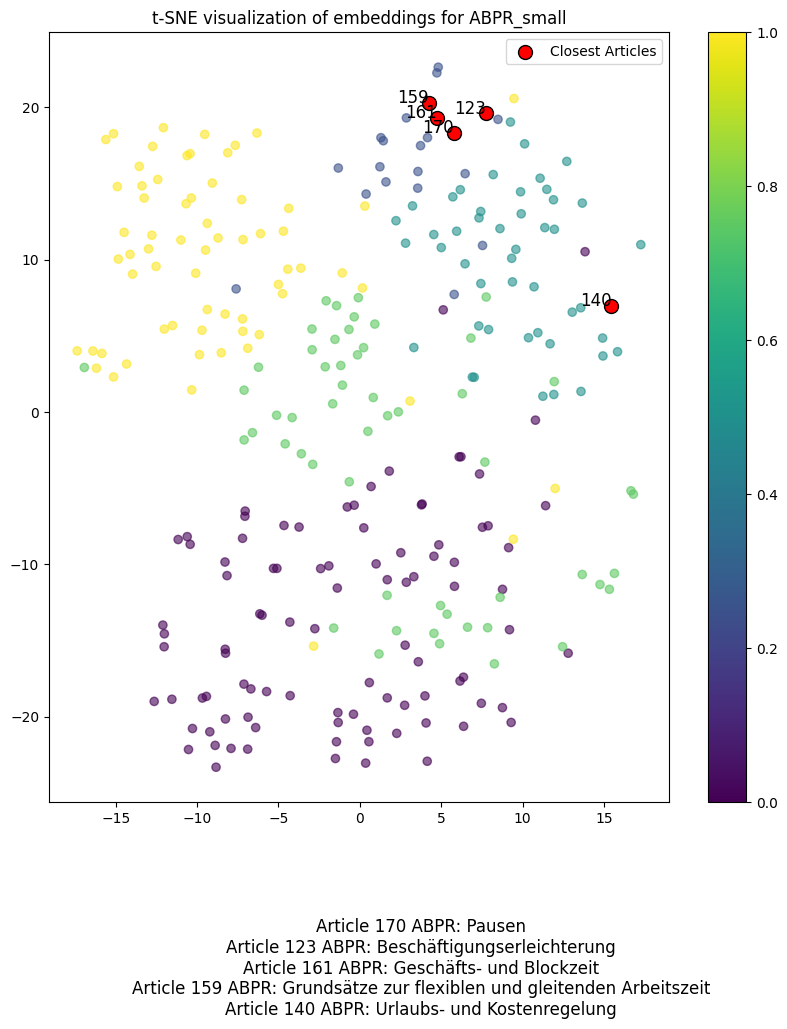

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.8036012053489685 Pausen
Article ID: 123 ABPR,  Distance: 0.9545287489891052 Beschäftigungserleichterung
Article ID: 161 ABPR,  Distance: 0.9949088096618652 Geschäfts- und Blockzeit
Article ID: 140 ABPR,  Distance: 1.0274989604949951 Urlaubs- und Kostenregelung
Article ID: 159 ABPR,  Distance: 1.046302080154419 Grundsätze zur flexiblen und gleitenden Arbeitszeit


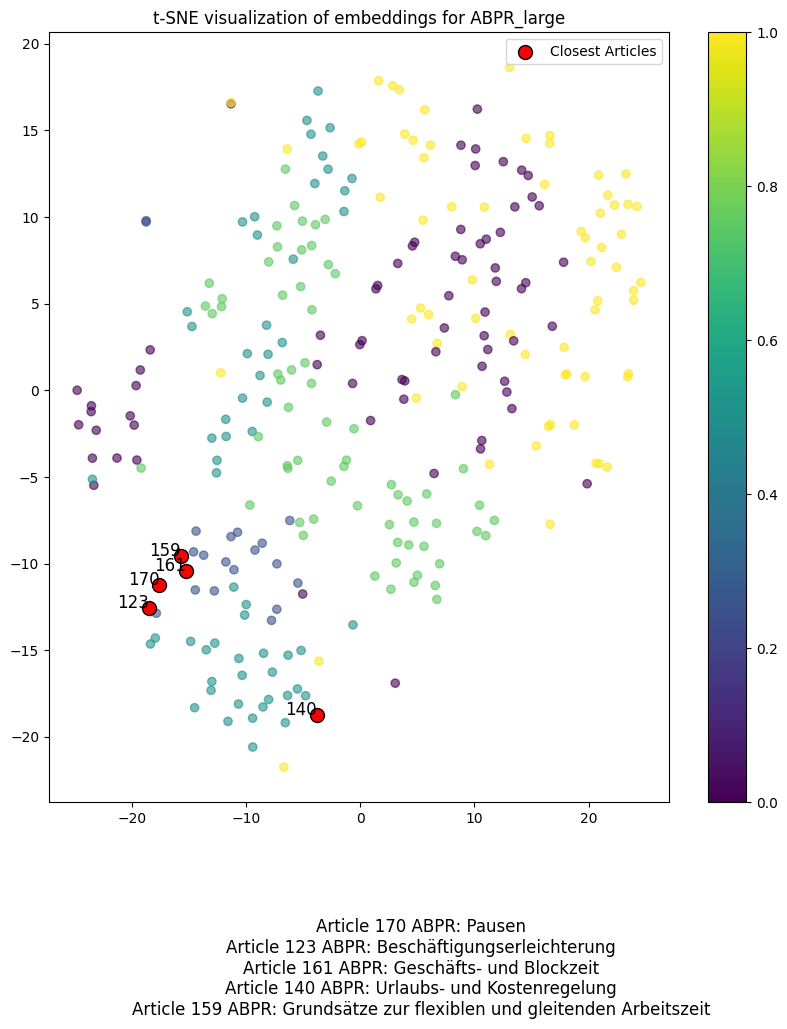

FAISS index dimensionality: 3072
Article ID: 14 ARG,  Distance: 0.7976270914077759 Pausen
Article ID: 41 ARG,  Distance: 1.0022704601287842 Arbeitnehmer mit Familienpflichten
Article ID: 18 ARG,  Distance: 1.0066488981246948 Dauer der Nachtarbeit
Article ID: 11 ARG,  Distance: 1.0288258790969849 Ausgleich ausfallender Arbeitszeit
Article ID: 15 ARG,  Distance: 1.0376850366592407 Tägliche Ruhezeit


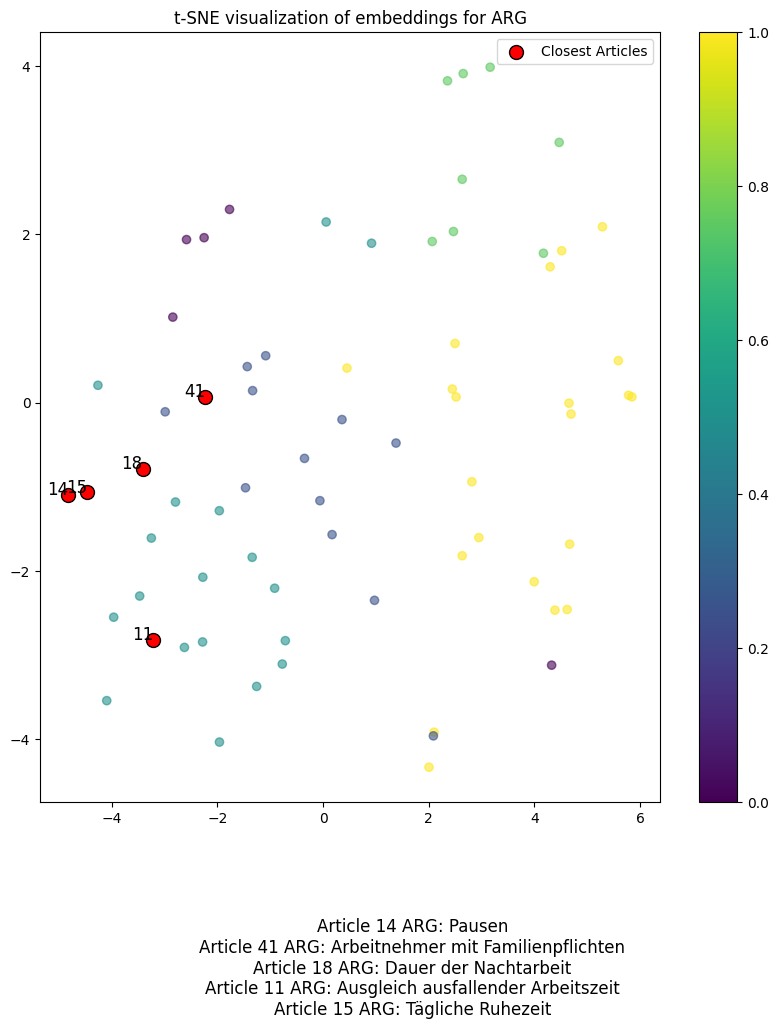

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.804650068283081 Pausen
Article ID: 123 ABPR,  Distance: 0.9550153017044067 Beschäftigungserleichterung
Article ID: 161 ABPR,  Distance: 0.996706485748291 Geschäfts- und Blockzeit
Article ID: 201 KAR,  Distance: 1.0158696174621582 Ruhetage
Article ID: 199 KAR,  Distance: 1.022271990776062 Ruhetage


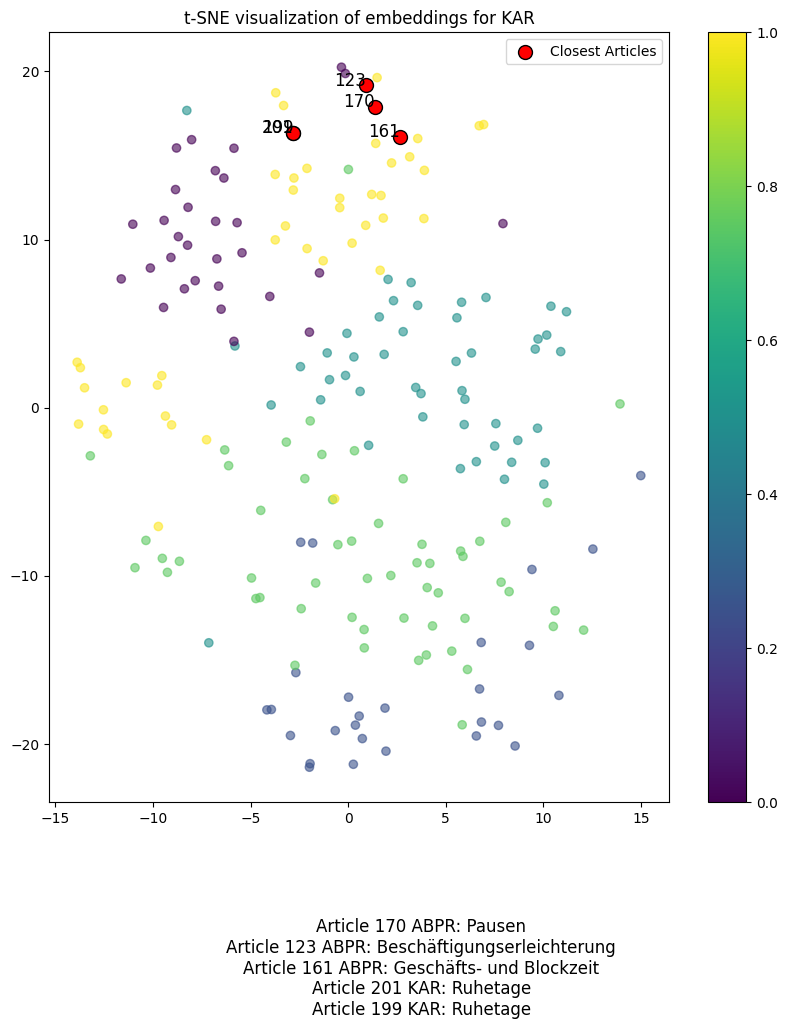

FAISS index dimensionality: 3072
Article ID: 283 PReg,  Distance: 0.7398272752761841 Pausenregelung
Article ID: 218 AZRG,  Distance: 0.783101499080658 Kurzpause
Article ID: 170 ABPR,  Distance: 0.7859522104263306 Pausen
Article ID: 285 PReg,  Distance: 0.8239342570304871 Verfügbarkeit während der Pause
Article ID: 217 AZRG,  Distance: 0.8306213021278381 Verpflegungspause


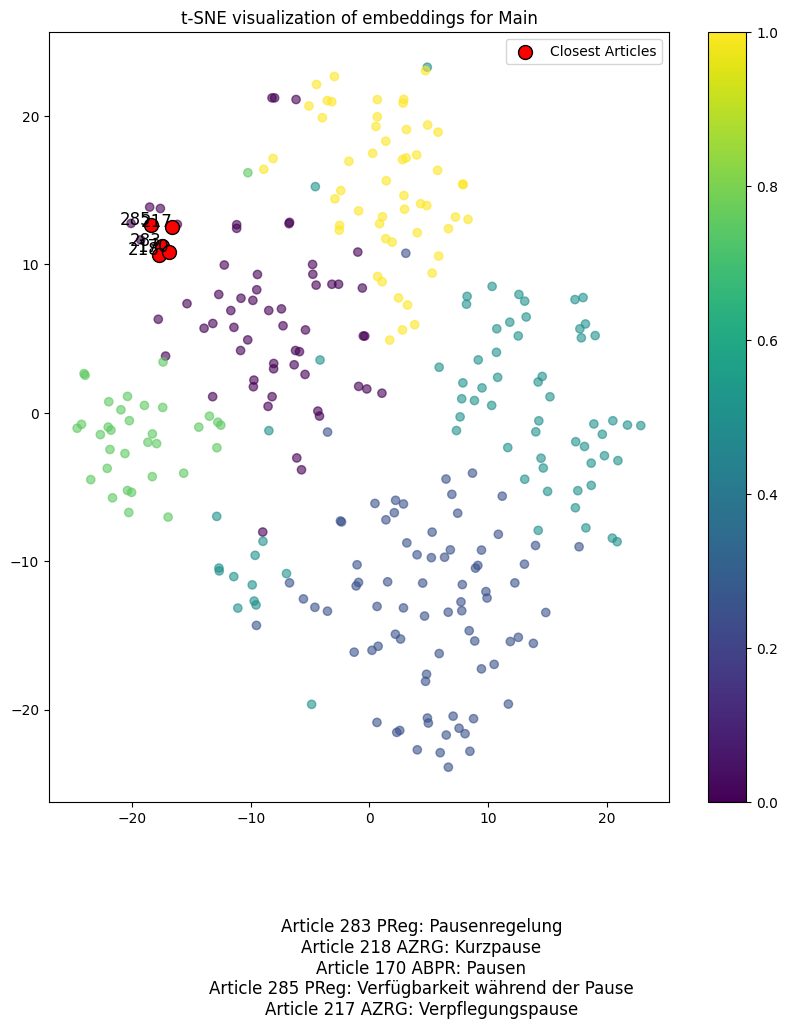

In [40]:
import json
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import openai
import os
from dotenv import load_dotenv
from openai import OpenAI

# Configure OpenAI API key
load_dotenv()
openai.api_key = os.getenv('OPENAI_API_KEY')

# Load Models
model_large = "text-embedding-3-large"  
model_small = "text-embedding-3-small" 

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def get_embedding_large(text, model=model_large):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def get_embedding_small(text, model=model_small):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def evaluate_model(json_files, index_files, names, models, query):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]
    if isinstance(names, str):
        names = [names]
    if isinstance(models, str):
        models = [models]

    for json_file, index_file, dataset_name, model in zip(json_files, index_files, names, models):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
         
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file'{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Check the dimensionality of the FAISS index
        print(f"FAISS index dimensionality: {index.d}")

        # Convert query to embedding
        if model == "large":
            query_embedding = get_embedding_large(query)
        elif model == "small":
            query_embedding = get_embedding_small(query)
        else:
            raise ValueError("Invalid model type specified")
            

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]).astype('float32'), k)
            return I[0], D[0]

        # Perform similarity search with the query embedding
        neighbors, distances = similarity_search(query_embedding)
        closest_titles = [data[idx]['title'] for idx in neighbors]
        closest_Gesetzestext = [data[idx]['metadata']['Gesetzestext'] for idx in neighbors]
        for idx, distance, gesetzestext, title in zip(neighbors, distances, closest_Gesetzestext, closest_titles):
            print(f"Article ID: {idx} {gesetzestext},  Distance: {distance} {title}")

        

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)

        # Highlight closest articles
        closest_points = embeddings_2d[neighbors]
        plt.scatter(closest_points[:, 0], closest_points[:, 1], c='red', edgecolors='k', s=100, label='Closest Articles')
        
        # Add article numbers
        for i, (x, y) in enumerate(closest_points):
            plt.text(x, y, str(neighbors[i]), fontsize=12, ha='right')

        plt.colorbar()
        plt.title(f"t-SNE visualization of embeddings for {dataset_name}")
        plt.legend()
        
        # Display list of closest articles at the bottom
        plt.figtext(0.5, -0.1, "\n".join([f"Article {idx} {gesetzestext}: {title} " for idx, title, gesetzestext in zip(neighbors, closest_titles, closest_Gesetzestext)]), 
                    wrap=True, horizontalalignment='center', fontsize=12)

        plt.show()

query = "Was sind die Pausenregelungen?"

evaluate_model(
    ["APP/data/ABPR/articles_small_embedded.json", "APP/data/ABPR/articles_large_embedded.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json", "APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/ABPR/articles_small.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index", "APP/data/JSON/articles_main.index"],
    ["ABPR_small", "ABPR_large", "ARG", "KAR", "Main"],
    ["small", "large", "large", "large", "large"],
    query
)



Originales Query: Was sind die Pausenregelungen?


improving query... 


improved query: Was sind die gesetzlich vorgeschriebenen Pausenregelungen für Angestellte am Stadtspital Zürich in der Schweiz?

Wie sind die Arbeitszeiten und Pausen am Stadtspital Zürich in der Schweiz geregelt?

Gibt es spezifische Regelungen für Mindestpausen und Ruhezeiten für Arbeitnehmer am Stadtspital Zürich in der Schweiz?

Welche Vorschriften gelten bezüglich Pausenregelungen für Mitarbeiter des Stadtspitals Zürich in der Schweiz?

Welche Pausenregelungen müssen gemäß schweizerischem Arbeitsrecht am Stadtspital Zürich eingehalten werden?

FAISS index dimensionality: 1536
Article ID: 176 ABPR,  Distance: 0.7150997519493103 Nacht- und Sonntagsarbeit
Article ID: 169 ABPR,  Distance: 0.7227671146392822 Arbeitsfreie Tage (Ruhetage)
Article ID: 183 ABPR,  Distance: 0.7590267658233643 Arbeitsmedizinische Untersuchung auf Wunsch von Angestellten
Article ID: 125 ABPR,  Distance: 0.7878813743591309 Besondere Verh

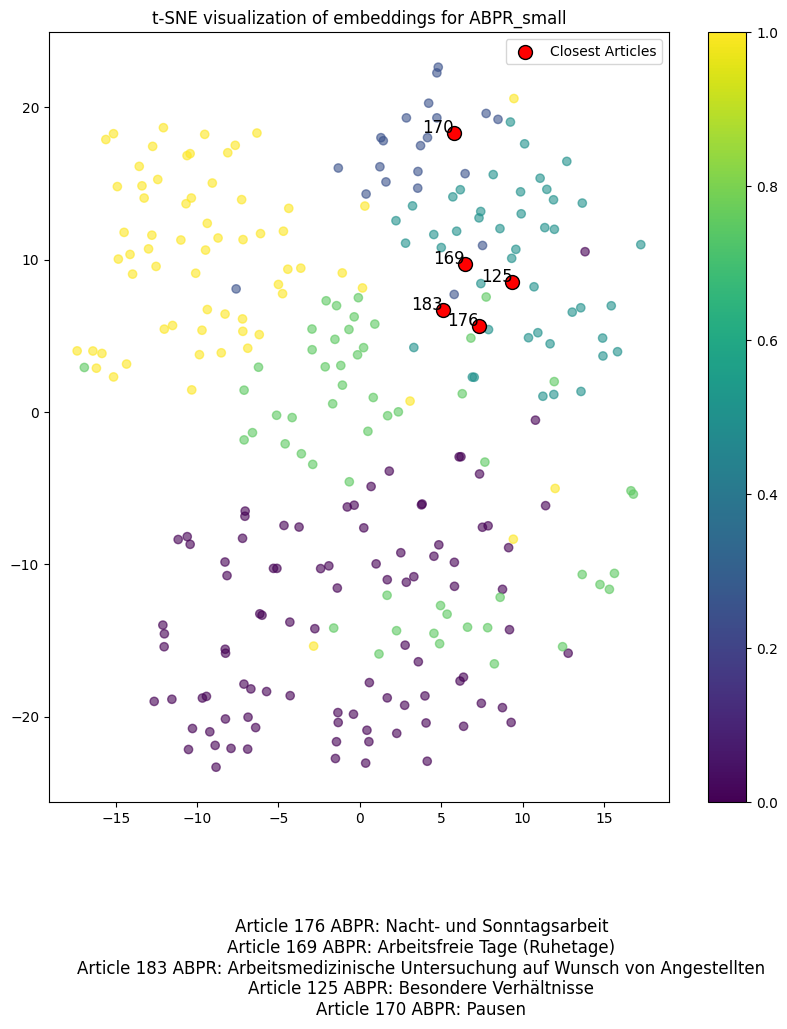

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.6647328734397888 Pausen
Article ID: 169 ABPR,  Distance: 0.7896955013275146 Arbeitsfreie Tage (Ruhetage)
Article ID: 183 ABPR,  Distance: 0.8404477834701538 Arbeitsmedizinische Untersuchung auf Wunsch von Angestellten
Article ID: 109 ABPR,  Distance: 0.848214328289032 Beiträge an Hauptmahlzeiten; Barvergütung an Stelle von Lunch-Checks bei angeordneter Überzeit oder bei verschobener Mittagszeit
Article ID: 276 PR,  Distance: 0.8557372093200684 Arbeitszeit


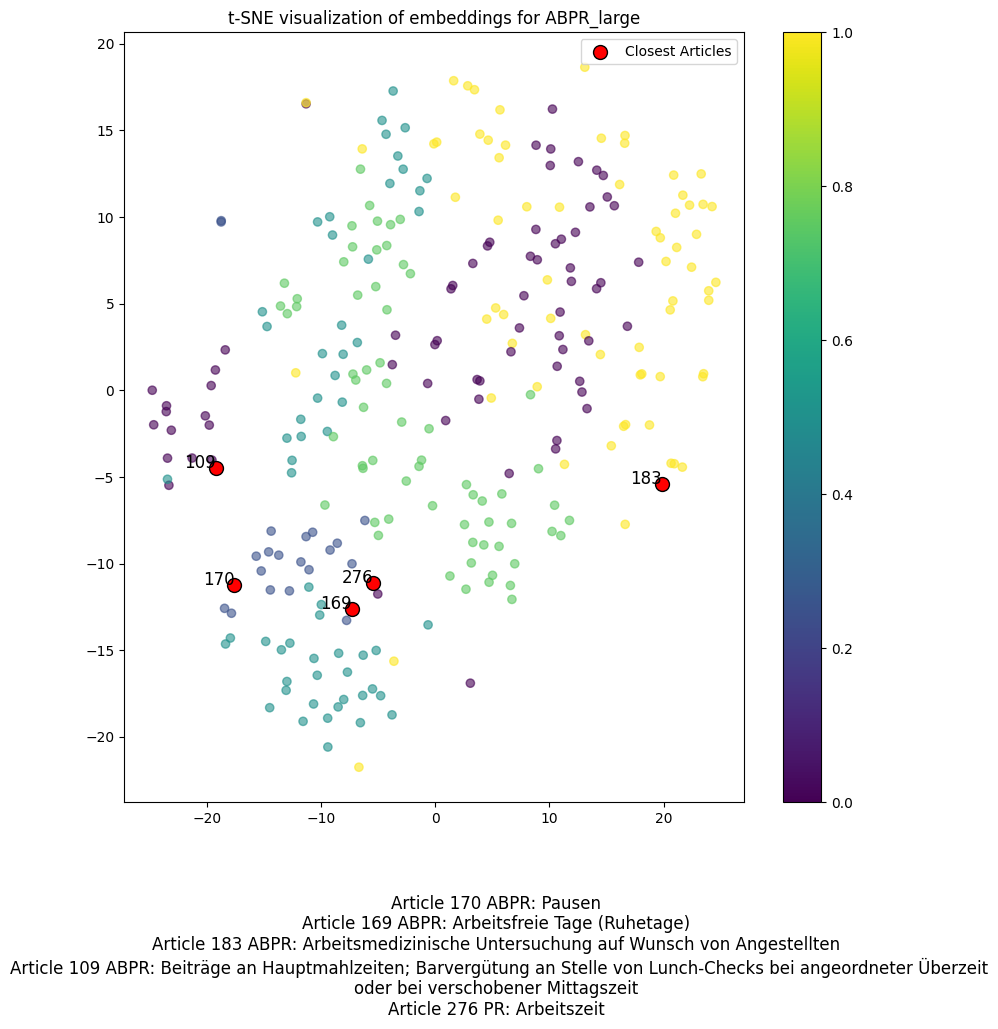

FAISS index dimensionality: 3072
Article ID: 14 ARG,  Distance: 0.8967549800872803 Pausen
Article ID: 39 ARG,  Distance: 0.8998342752456665 Beschäftigung bei Mutterschaf
Article ID: 41 ARG,  Distance: 0.9099963307380676 Arbeitnehmer mit Familienpflichten
Article ID: 19 ARG,  Distance: 0.9178711771965027 Lohn- und Zeitzuschlag
Article ID: 9 ARG,  Distance: 0.9190917015075684 Wöchentliche Höchstarbeitszeit


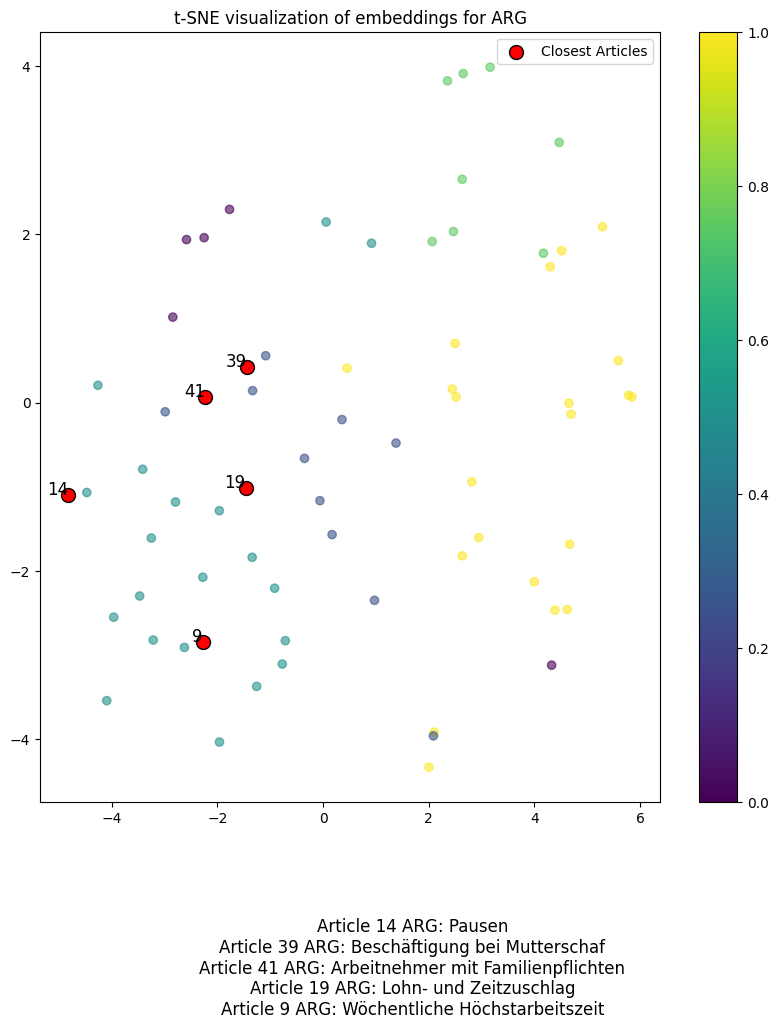

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.664214551448822 Pausen
Article ID: 169 ABPR,  Distance: 0.7900649309158325 Arbeitsfreie Tage (Ruhetage)
Article ID: 198 KAR,  Distance: 0.8269022703170776 Arbeitszeit
Article ID: 183 ABPR,  Distance: 0.8410214185714722 Arbeitsmedizinische Untersuchung auf Wunsch von Angestellten
Article ID: 109 ABPR,  Distance: 0.8489898443222046 Beiträge an Hauptmahlzeiten; Barvergütung an Stelle von Lunch-Checks bei angeordneter Überzeit oder bei verschobener Mittagszeit


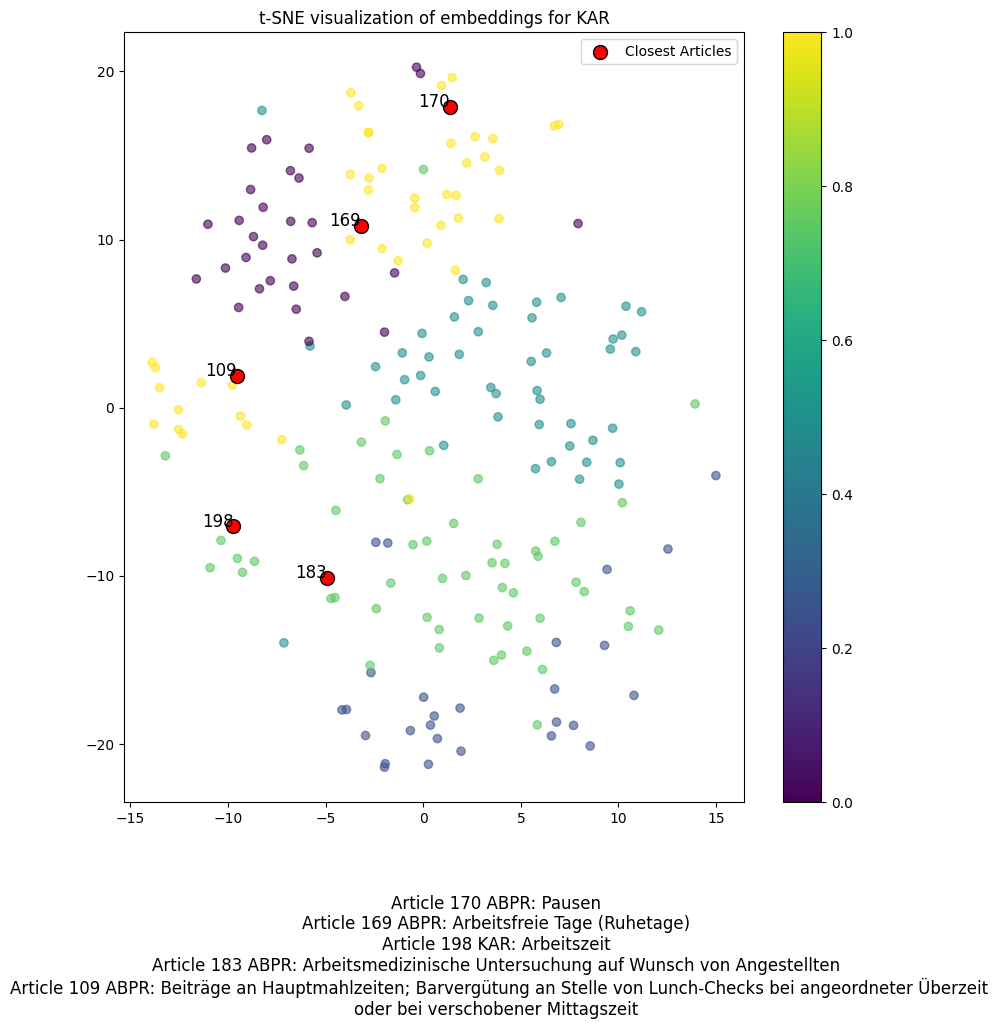

FAISS index dimensionality: 3072
Article ID: 217 AZRG,  Distance: 0.6370444297790527 Verpflegungspause
Article ID: 282 PReg,  Distance: 0.6427491903305054 Allgemeines
Article ID: 170 ABPR,  Distance: 0.648392379283905 Pausen
Article ID: 283 PReg,  Distance: 0.6573871374130249 Pausenregelung
Article ID: 284 PReg,  Distance: 0.6710935831069946 Pausenregelung für Assistenzärztinnen und -ärzte


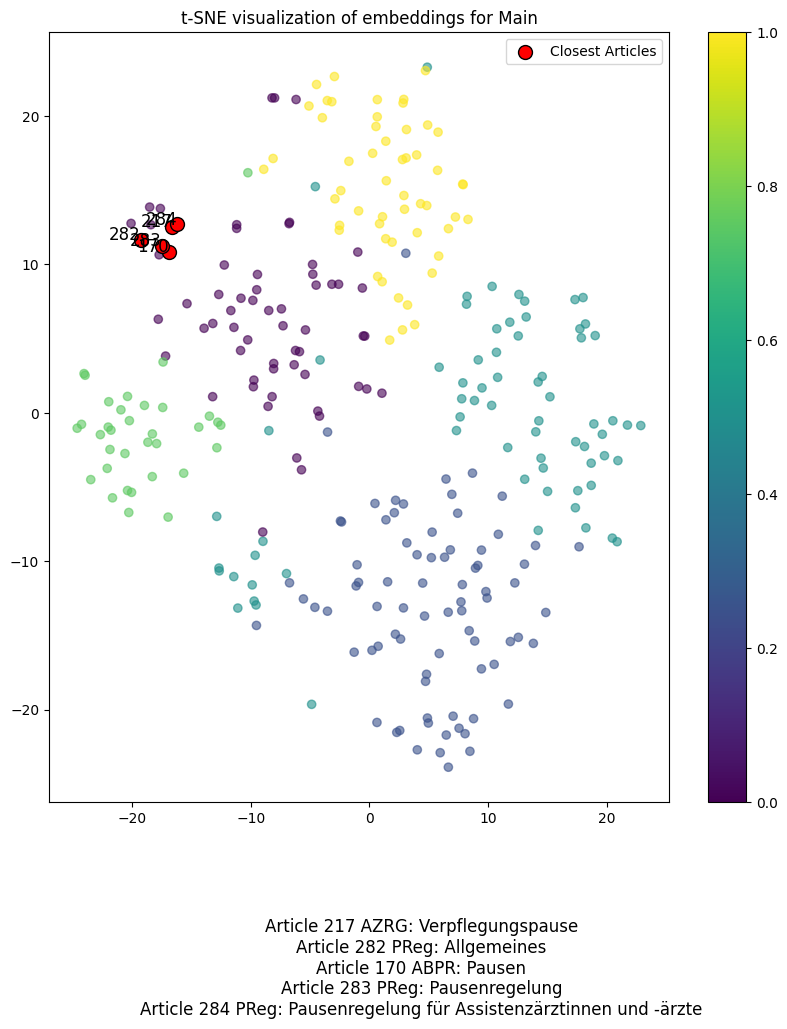

In [42]:
import json
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import openai
import os
from dotenv import load_dotenv

# Configure OpenAI API key
load_dotenv()
client = OpenAI()
client.api_key= os.getenv('OPENAI_API_KEY')

 

# Load Models
model_large = "text-embedding-3-large"  
model_small = "text-embedding-3-small" 

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def get_embedding_large(text, model=model_large):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def get_embedding_small(text, model=model_small):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def evaluate_model(json_files, index_files, names, models, query):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]
    if isinstance(names, str):
        names = [names]
    if isinstance(models, str):
        models = [models]

    for json_file, index_file, dataset_name, model in zip(json_files, index_files, names, models):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
         
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file'{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Check the dimensionality of the FAISS index
        print(f"FAISS index dimensionality: {index.d}")

        # Convert query to embedding
        if model == "large":
            query_embedding = get_embedding_large(query)
        elif model == "small":
            query_embedding = get_embedding_small(query)
        else:
            raise ValueError("Invalid model type specified")
            

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]).astype('float32'), k)
            return I[0], D[0]

        # Perform similarity search with the query embedding
        neighbors, distances = similarity_search(query_embedding)
        closest_titles = [data[idx]['title'] for idx in neighbors]
        closest_Gesetzestext = [data[idx]['metadata']['Gesetzestext'] for idx in neighbors]
        for idx, distance, gesetzestext, title in zip(neighbors, distances, closest_Gesetzestext, closest_titles):
            print(f"Article ID: {idx} {gesetzestext},  Distance: {distance} {title}")

        

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)

        # Highlight closest articles
        closest_points = embeddings_2d[neighbors]
        plt.scatter(closest_points[:, 0], closest_points[:, 1], c='red', edgecolors='k', s=100, label='Closest Articles')
        
        # Add article numbers
        for i, (x, y) in enumerate(closest_points):
            plt.text(x, y, str(neighbors[i]), fontsize=12, ha='right')

        plt.colorbar()
        plt.title(f"t-SNE visualization of embeddings for {dataset_name}")
        plt.legend()
        
        # Display list of closest articles at the bottom
        plt.figtext(0.5, -0.1, "\n".join([f"Article {idx} {gesetzestext}: {title} " for idx, title, gesetzestext in zip(neighbors, closest_titles, closest_Gesetzestext)]), 
                    wrap=True, horizontalalignment='center', fontsize=12)

        plt.show()

query = "Was sind die Pausenregelungen?"


def refine_query(query):
    print("\nOriginales Query: " + query + "\n")
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": f"Erweitere die User Frage: <anfrage>{query}</anfrage>, mit Suchbegriffen, damit die Frage möglichst gute RAG ergebnisse liefert. Der erweiterte Anfrage soll ich immer auf den Kontext einer Anstellung am Stadtspital Zürich in der Schweiz beziehen. Alle Antworten sollen als Fragen formuliert sein"},
        ]
    )
    response = response.choices[0].message.content
    print("\nimproving query... \n")
    print("\nimproved query: " + response + "\n")
    return response


query = refine_query(query)


evaluate_model(
       ["APP/data/ABPR/articles_small_embedded.json", "APP/data/ABPR/articles_large_embedded.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json", "APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/ABPR/articles_small.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index", "APP/data/JSON/articles_main.index"],
    ["ABPR_small", "ABPR_large", "ARG", "KAR", "Main"],
    ["small", "large", "large", "large", "large"],
    query
)


# Evaluation of the direct PDF Aproach

<>:71: SyntaxWarning: invalid escape sequence '\V'
<>:71: SyntaxWarning: invalid escape sequence '\V'
C:\Users\spunk\AppData\Local\Temp\ipykernel_19176\640175399.py:71: SyntaxWarning: invalid escape sequence '\V'
  evaluate_model('E:\VS_Code\ZHAW\ML2\ML2_Project\RAG_CHATBOT\sample_data\Personalrecht.pdf', 'Was sind Nachtzulagen?')
e:\VS_Code\ZHAW\ML2\ML2_Project\RAG_CHATBOT\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Query embedding shape: (1, 384)
Embeddings shape: (424, 384)


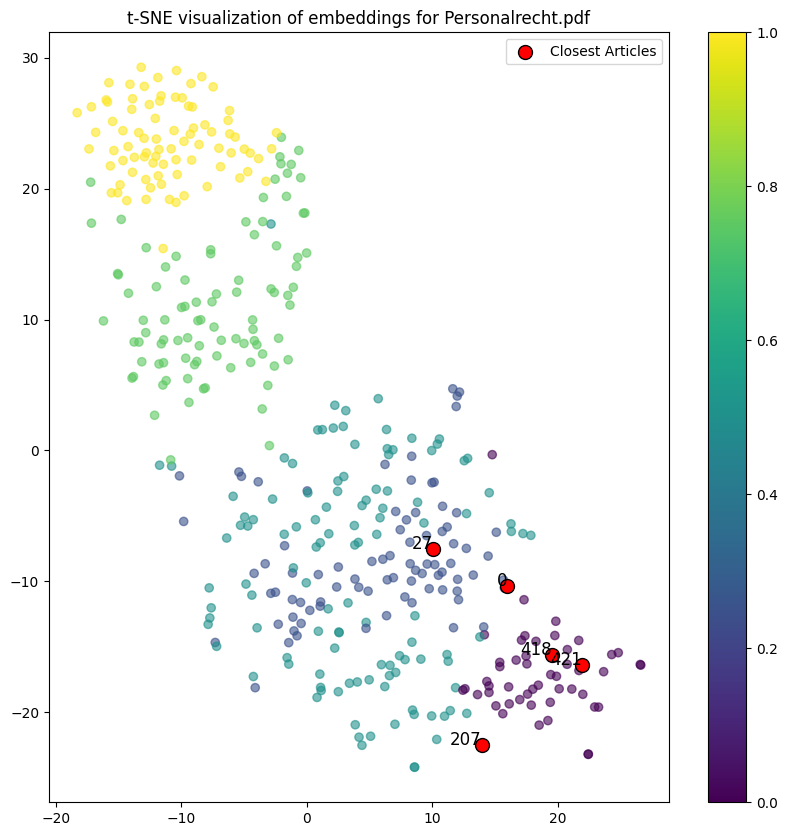

Chunk ID: 421, Content: 62 89, 91, 92 
Treueprämie: Berechnung 13, 62 88, 91, 191 
Treueprämie: Teilprämie  90 
 223 Schlagwort PR Art. AB PR Art. 
Treueurlaub  135 
U   
Überbrückungszuschuss 27  
Übergangsbestimmungen 89 187ff 
Überleitung 89 187, 188 
Überstunden → siehe Überzeit   
Überwachung  55 
Überzeit: Barvergütung von 
Mahlzeiten  109 
Überzeit: Grundsätze  162, 167, 
173 
Überzeit: pauschale bzw.  beschränkte Abgeltung  174, 175 
Überzeit: Zuständigkeit 58, 81 174 
Umschulung  38 
Unbezahlter Urlaub:  
Arbeitgeberleistungen  138 
Unbezahlter Urlaub: Gründe  134, 135, 
136 
Unbezahlter Urlaub: Grundsätze  127, 128 
Unbezahlter Urlaub:  Lohnkürzung, Ferienkürzung  75, 117 
Unbezahlter Urlaub:  
Zuständigkeit 70 23, 24, 40, 
137 
Unfall → siehe Krankheit   
Unfallversicherung  
→ siehe auch Versicherungen 86  
Unfallversicherung:  
Arbeitgeberleistungen 86 138 
224 Schlagwort PR Art. AB PR Art. 
Unfallversicherung: Wegfall  
Versicherungsschutz  87 
Unterstützungszulagen  126 

In [43]:
import os
import json
import faiss
import numpy as np
import PyPDF2
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

def split_pdf_to_text_chunks(pdf_path, chunk_size=1000):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text() + "\n"
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    return chunks

def create_embeddings(text_chunks, model):
    return model.encode(text_chunks)

def build_faiss_index(embeddings):
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(embeddings)
    return index

def similarity_search(index, query_embedding, k=5):
    query_embedding = np.array(query_embedding).astype('float32')
    if query_embedding.ndim == 1:
        query_embedding = np.expand_dims(query_embedding, axis=0)
    D, I = index.search(query_embedding, k)
    return I[0], D[0]

def visualize_retrieval(embeddings, neighbors, dataset_name):
    similarity_matrix = cosine_similarity(embeddings)
    kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
    labels = kmeans.labels_
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
    closest_points = embeddings_2d[neighbors]
    plt.scatter(closest_points[:, 0], closest_points[:, 1], c='red', edgecolors='k', s=100, label='Closest Articles')
    for i, (x, y) in enumerate(closest_points):
        plt.text(x, y, str(neighbors[i]), fontsize=12, ha='right')
    plt.colorbar()
    plt.title(f"t-SNE visualization of embeddings for {dataset_name}")
    plt.legend()
    plt.show()

def evaluate_model(pdf_path, query, model_name='all-MiniLM-L6-v2'):
    model = SentenceTransformer(model_name)
    text_chunks = split_pdf_to_text_chunks(pdf_path)
    embeddings = create_embeddings(text_chunks, model)
    index = build_faiss_index(np.array(embeddings))
    query_embedding = model.encode([query])
    
    print(f"Query embedding shape: {query_embedding.shape}")
    print(f"Embeddings shape: {embeddings.shape}")
    
    neighbors, distances = similarity_search(index, query_embedding)
    visualize_retrieval(np.array(embeddings), neighbors, os.path.basename(pdf_path))
    for idx in neighbors:
        print(f"Chunk ID: {idx}, Content: {text_chunks[idx]}")

# Example usage
evaluate_model('E:\VS_Code\ZHAW\ML2\ML2_Project\RAG_CHATBOT\sample_data\Personalrecht.pdf', 'Was sind Nachtzulagen?')
